In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import category_encoders as ce
import mlflow
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
import mlflow
import pickle

In [4]:
from sklearn.feature_selection import RFE

In [5]:
df=pd.read_csv("Passenger_Satisfaction.csv",index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [7]:
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
df.drop("id",axis=1,inplace=True)

In [9]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('category')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.0,3.0,4.0,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.0,3.0,4.0,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.0,3.0,4.0,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.0,3.0,4.0,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,103904.0,3.358158,1.332991,0.0,2.0,4.0,4.0,5.0


In [11]:
df.isna().sum()/len(df)*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

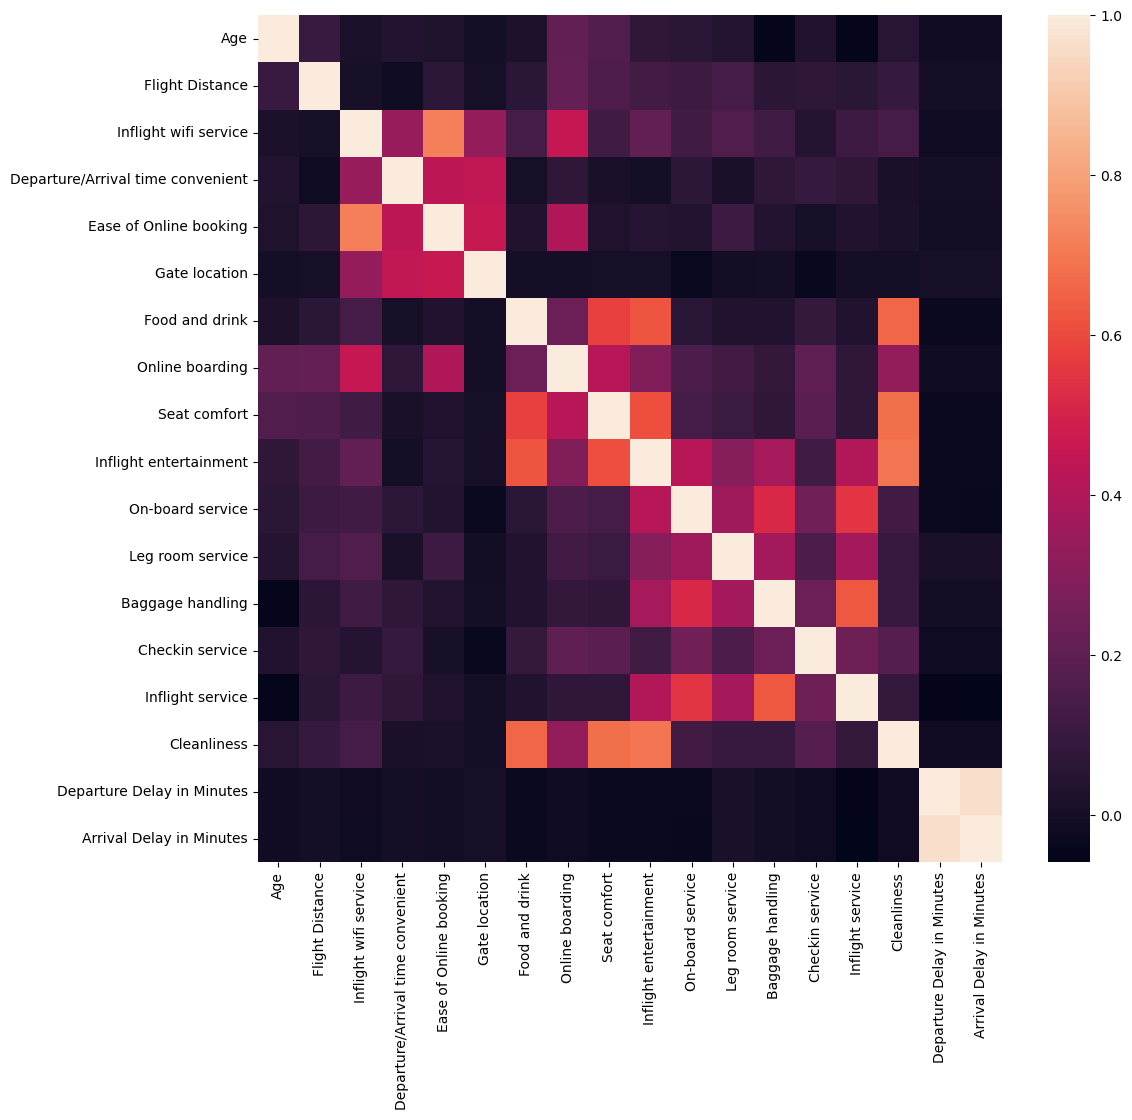

In [12]:
plt.figure(figsize=(12,11))
sns.heatmap(df.select_dtypes(include='number').corr())
plt.show()

In [13]:
df.drop("Arrival Delay in Minutes",axis=1,inplace=True) # due to high correlation

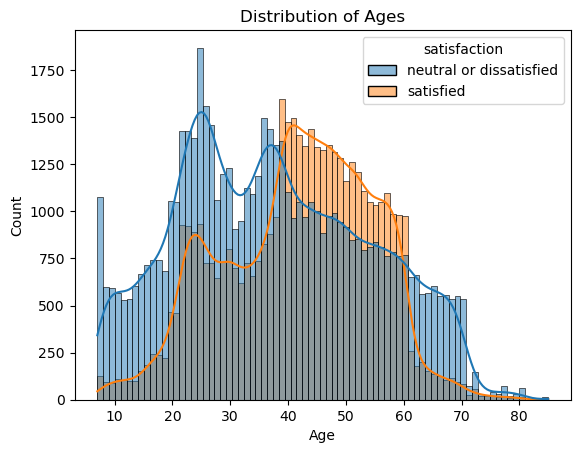

In [14]:
sns.histplot(data=df,x='Age',hue='satisfaction',kde=True)
plt.title("Distribution of Ages")
plt.show()

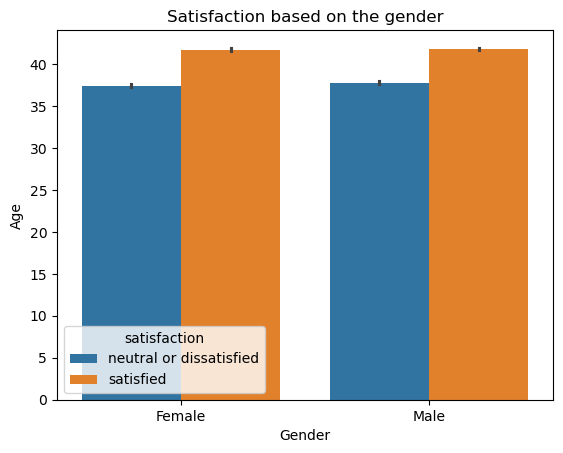

In [15]:
sns.barplot(data=df,x="Gender",y="Age",hue="satisfaction")
plt.title("Satisfaction based on the gender")
plt.show()

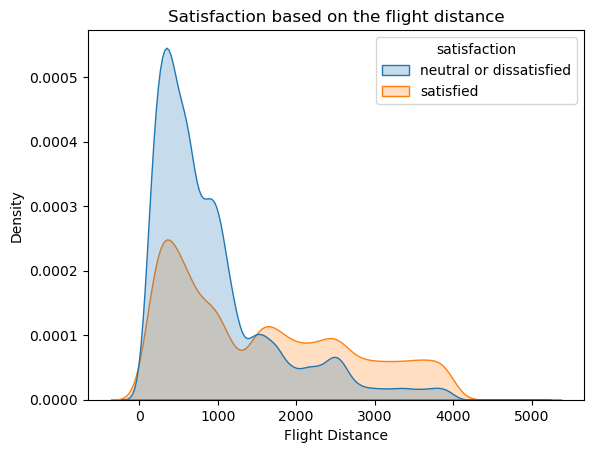

In [16]:
sns.kdeplot(data=df,x="Flight Distance",hue="satisfaction",fill=True)
plt.title("Satisfaction based on the flight distance")
plt.show()

In [17]:
categorical_data=df.select_dtypes(include='category')
categorical_data.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [18]:
numerical_data=df.select_dtypes(include=['int64','float64'])
numerical_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0


In [19]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [20]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [21]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


In [22]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

In [23]:
df=df.drop(columns=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],axis=1)

In [24]:
# df.to_csv("passenger_data.csv")

In [25]:
# X=df.drop(columns=['satisfaction'])
# y=df['satisfaction'].map({"neutral or dissatisfied":0,"satisfied":2})
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# ce_OHE=ce.OneHotEncoder(cols=['Gender','Customer Type','Type of Travel','Class'])
# X_train=ce_OHE.fit_transform(X_train)
# X_test=ce_OHE.transform(X_test)

In [27]:
# #Normalization
# scaler=StandardScaler()
# columns=['Age','Flight Distance','Departure Delay in Minutes']
# X_train[columns]=scaler.fit_transform(X_train[columns])
# X_test[columns]=scaler.transform(X_test[columns])


In [28]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# # Train a model (if not already done)
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Get feature importance
# feature_importances = model.feature_importances_

# # Create a DataFrame for feature importance
# feature_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': feature_importances
# })

# # Sort by importance
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# # Display feature importance
# print(feature_importance_df)


In [29]:
#                        Feature  Importance
# 10             Flight Distance    0.388949
# 4                          Age    0.167125
# 8                      Class_2    0.102727
# 11  Departure Delay in Minutes    0.084702
# 5             Type of Travel_1    0.084057
# 7                      Class_1    0.058571
# 6             Type of Travel_2    0.049100
# 3              Customer Type_2    0.029655
# 2              Customer Type_1    0.028412
# 9                      Class_3    0.004760
# 0                     Gender_1    0.000975
# 1                     Gender_2    0.000966

In [30]:
X=df.drop(columns='satisfaction',axis=1)
y=df['satisfaction']

In [31]:
columns=df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Age', 'Flight Distance', 'Departure Delay in Minutes']]

In [32]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_cols =['Age','Departure Delay in Minutes','Flight Distance']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'),categorical_cols)
])

In [33]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Age', 'Departure Delay in Minutes',
                                  'Flight Distance']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class'])])

In [41]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=200, C=1.0),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, max_depth=None),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=300, learning_rate=0.3)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        pipeline = Pipeline(steps=[
            ('preprocessing', preprocessor),
            ('classifier', model)
        ])
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        acc = accuracy_score(y_test, y_pred)

        mlflow.log_metric("accuracy", acc)
        mlflow.log_params(model.get_params())
        mlflow.sklearn.log_model(pipeline, artifact_path="model")

        # Save pipeline to disk
        with open(f"{name}_pipeline.pkl", "wb") as f:
            pickle.dump(pipeline, f)
        mlflow.log_artifact(f"{name}_pipeline.pkl")

        print(f"\n{name} Model")
        print(f"Accuracy: {acc:.2f}")
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print(f"✅ Saved: {name}_pipeline.pkl")


LogisticRegression Model
R²  : 0.78
                         precision    recall  f1-score   support

neutral or dissatisfied       0.82      0.79      0.80     11713
              satisfied       0.74      0.77      0.76      9068

               accuracy                           0.78     20781
              macro avg       0.78      0.78      0.78     20781
           weighted avg       0.78      0.78      0.78     20781

[[9288 2425]
 [2088 6980]]
✅ Pipeline saved as: LogisticRegression_pipeline.pkl

RandomForestClassifier Model
R²  : 0.76
                         precision    recall  f1-score   support

neutral or dissatisfied       0.78      0.79      0.79     11713
              satisfied       0.72      0.71      0.72      9068

               accuracy                           0.76     20781
              macro avg       0.75      0.75      0.75     20781
           weighted avg       0.76      0.76      0.76     20781

[[9270 2443]
 [2630 6438]]
✅ Pipeline saved as: RandomFo